# Linear Regression using pseudo inverse

## Step 1: Import All required Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## Step 2: Import Linear Regression for checking accuracy of defined model with original model

In [ ]:
from sklearn.linear_model import LinearRegression

## Step 3: Defining class and functions for model training in this defined model the update function is used for updating the wieght using gradient decent

In [ ]:
  class learning() :
    # constructor
    def __init__(self):
        self.weights = 0
    # here the np.linalg.pinv function is used to calculate the inverse of x*x^T
    def fit_model(self, X, y):
        X2 = np.linalg.pinv(np.matmul(X.T, X)).dot(X.T)
        self.weights = np.matmul(X2, y)
        return self.weights

    def predict(self, x):
        y_pred = x.dot(self.weights) 
        return y_pred

    def error(self, X, y):
        error = 0
        X = np.insert(X.T, 0, 1, axis=0)
        for i, x in enumerate(X.T):
            if self.predict(x)!=y[i]:
                error += 1
        return error/len(y)

## Step 4: Loading CSV File for dataset (For this i have used boston house price predicition dataset provided by sklearn)

In [ ]:
boston = load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
target = pd.DataFrame(boston.target,columns=['target'])
df = pd.concat([features,target],axis=1)
print(boston.feature_names)
print(df.shape,df)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 14)         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.4

## Step 5: Store the features and target in X , Y seprately, here i have used the LSTAT feature as when using others the error were more (Any other feature can also be chosen for predicting target)

In [ ]:
X = df['LSTAT'].values
Y = df['target'].values

# Reshaping the array using min max scaler
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[ : -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[ : -1]

print(X.shape)
print(Y.shape)

(505, 1)
(505, 1)


## Step 6: Splitting the Data into three ratios 70/30, 80/20, 90/10
A. Split the data in 70,30 for training and testing the model 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(353, 1) (152, 1) (353, 1) (152, 1)


B. Split the data in 80,20 for training and testing the model 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 1) (101, 1) (404, 1) (101, 1)


C. Split the data in 90,10 for training and testing the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(454, 1) (51, 1) (454, 1) (51, 1)


## Step 7: Creating model object and passing values which are no of iterations and learning rate

In [ ]:
model = learning()

## Step 8: Fitting model using training data

In [ ]:
model.fit_model(X_train,y_train)

(454, 1)
(1, 454)
(1, 1)


array([[0.67537663]])

## Step 9: Creating model provided by Sklearn and fitting that model with training data

In [ ]:
model1 = LinearRegression()
model1.fit( X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 10: Predicting the values of both models using test data

In [ ]:
target = model.predict(X_test)
target1 = model1.predict( X_test )
print(target,target1,y_test)

[[0.10809008]
 [0.1015674 ]
 [0.31812029]
 [0.11871273]
 [0.23220731]
 [0.17499411]
 [0.05534958]
 [0.21077565]
 [0.30172041]
 [0.13194444]
 [0.16791235]
 [0.05367232]
 [0.2213983 ]
 [0.15859424]
 [0.18617584]
 [0.40272873]
 [0.21823014]
 [0.05404504]
 [0.10622646]
 [0.51808693]
 [0.18207588]
 [0.27805241]
 [0.14070347]
 [0.08181301]
 [0.05479049]
 [0.28755688]
 [0.34682007]
 [0.16399874]
 [0.1030583 ]
 [0.53840041]
 [0.07007219]
 [0.31178397]
 [0.02143165]
 [0.2992977 ]
 [0.13716258]
 [0.19158035]
 [0.41465591]
 [0.06709039]
 [0.32762476]
 [0.16493055]
 [0.1045492 ]
 [0.09355383]
 [0.10939461]
 [0.30582038]
 [0.33899285]
 [0.35203821]
 [0.00354088]
 [0.09839924]
 [0.15058066]
 [0.16586236]
 [0.23537547]] [[0.49972615]
 [0.50705185]
 [0.26383855]
 [0.48779572]
 [0.36032851]
 [0.42458538]
 [0.55895968]
 [0.38439867]
 [0.28225746]
 [0.47293501]
 [0.432539  ]
 [0.56084343]
 [0.37246824]
 [0.44300429]
 [0.41202703]
 [0.16881374]
 [0.37602644]
 [0.56042482]
 [0.50181921]
 [0.03925347]
 [0.4

## Step 11: Checking for Accuracy by plotting the target values and the presicted values by both the models



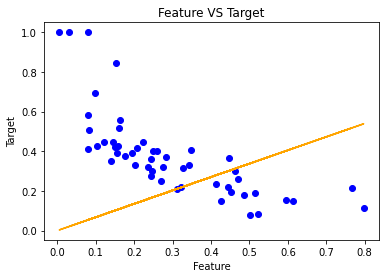

In [ ]:
plt.scatter( X_test, y_test, color = 'blue' )  
plt.plot( X_test, target, color = 'orange' )  
plt.title( 'Feature VS Target' )  
plt.xlabel( 'Feature' )  
plt.ylabel( 'Target' )  
plt.show()

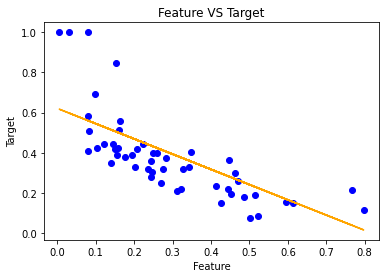

In [ ]:
plt.scatter( X_test, y_test, color = 'blue' )  
plt.plot( X_test, target1, color = 'orange' )    
plt.title( 'Feature VS Target' )  
plt.xlabel( 'Feature' )  
plt.ylabel( 'Target' )    
plt.show()

In [ ]:
print("Mean squared error in Predicition by defined model : ",mean_squared_error(target,y_test)*100)
print("Mean squared error in Predicition by original(sklearn) model : ",mean_squared_error(target1,y_test)*100)

Mean squared error in Predicition by defined model :  13.278081692477011
Mean squared error in Predicition by original(sklearn) model :  2.142687769346051
